
Template for implementation of the simple linear regression.
The code serves only for educational purposes so it
is not optimized in view of speed or numerical calculations.
For the real problems you should always use algorithms
from known,  well tested libraries, wherever possible.

Author: Wojtek Krzemien

Date: 23.03 2018


In [2]:
#some imports
import pandas as pd
#for visualization
import numpy as np
import matplotlib.pyplot as plt
#to download file
import urllib.request

%matplotlib inline

In [3]:
#Please note 'raw' prefix in the url and the lack of 'blob' part
url='https://raw.github.com/wkrzemien/dataScienceAndML2020/master/datasets/x08.csv'
urllib.request.urlretrieve(url,'x08.csv')

('x08.csv', <http.client.HTTPMessage at 0x2be40382100>)

In [4]:
input_file = 'x08.csv'

In [5]:
#Column descripton based on x08.txt
#Index
#Inhabitants
#Percent with incomes below $5000
#Percent unemployed
#Murders per annum per 1,000,000 inhabitants

In [6]:
data = pd.read_csv(input_file, names=['index','inhabitants','incomeBelow5k','unemployed','murders'])

In [7]:
data.head()

,index,inhabitants,incomeBelow5k,unemployed,murders
0,1,587000,16.5,6.2,11.2
1,2,643000,20.5,6.4,13.4
2,3,635000,26.3,9.3,40.7
3,4,692000,16.5,5.3,5.3
4,5,1248000,19.2,7.3,24.8


In [8]:
data.dtypes

index              int64
inhabitants        int64
incomeBelow5k    float64
unemployed       float64
murders          float64
dtype: object

In [9]:
print(data.columns.values)

['index' 'inhabitants' 'incomeBelow5k' 'unemployed' 'murders']


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          20 non-null     int64  
 1   inhabitants    20 non-null     int64  
 2   incomeBelow5k  20 non-null     float64
 3   unemployed     20 non-null     float64
 4   murders        20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 928.0 bytes


In [11]:
data.describe()

,index,inhabitants,incomeBelow5k,unemployed,murders
count,20.00000,2.000000e+01,20.000000,20.000000,20.000000
mean,10.50000,1.433000e+06,19.720000,6.935000,20.570000
std,5.91608,1.703726e+06,3.242254,1.207117,9.881407
min,1.00000,5.870000e+05,14.300000,4.900000,5.300000
25%,5.75000,6.430000e+05,17.125000,6.150000,13.225000
50%,10.50000,7.450000e+05,19.150000,6.600000,19.500000
75%,15.25000,1.318750e+06,21.575000,7.775000,26.075000
max,20.00000,7.895000e+06,26.300000,9.300000,40.700000


In [12]:
data.count()

index            20
inhabitants      20
incomeBelow5k    20
unemployed       20
murders          20
dtype: int64

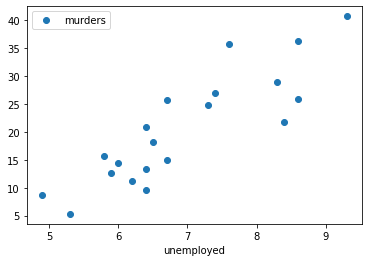

In [13]:
data.plot(x='unemployed', y='murders', style='o')

In [14]:
FILE_NAME = 'x08.csv'

In [15]:
def expval(X): #expected value
    expval = sum(X)/len(X)
    return expval

def variance(X):
    diff=[]
    square=[]
    for i in range(len(X)):
        diff.append(X[i]-expval(X))   
        square.append(diff[i]*diff[i])
    var = expval(square)
    return var

def covariance(X,Y):
    prod=[]
    for i in range(len(X)):
        prod.append(X[i]*Y[i])    
    cov = expval(prod)-expval(X)*expval(Y)
    return cov

In [16]:
# functions operating on 'normal' lists
# without using any additional functions.

class MySimpleLinearRegression():
    def __init__(self):
        self._theta = [0, 0]

    def fit(self, X, Y):
        theta1=covariance(X,Y)/variance(X)
        theta0=expval(Y)-theta1*expval(X)
        """
        Args:
        X(list): vector of numbers X^{i} i=1,...,N from the training set.
        Y(list): vector of numbers Y^{i} i=1,...,N from the training set.
        Returns:
        list: with parameters [theta0, theta1]
        """
        self._theta=[theta0,theta1]
        return [theta0,theta1] 

    def getParams(self):
        """
          Returns:
            list: with parameters [theta0, theta1]
        """
        return self._theta

    def predict(self, x):
        theta0 = self._theta[0]
        theta1 = self._theta[1]
        """
        Args:
        x(number)
        Returns:
        float:  y prediction
        """
        y=theta0+x*theta1
        return y 

In [17]:
def runTests_MySimpleLinearRegression():
    """
    Some examples how one can test your functions.
    """
    model = MySimpleLinearRegression()
    # y= 2 *x -4 no noise
    x = [0, 1, 2, 3]
    y = [-4., -2, 0, 2]
    model.fit(x, y)
    params = model.getParams()
    #print(params)
    np.testing.assert_almost_equal(params[0], -4.)
    np.testing.assert_almost_equal(params[1], 2.)
    np.testing.assert_almost_equal(model.predict(7), 10.)

In [18]:
def loadData(filename):
    data = pd.read_csv(filename, names=['index','inhabitants','incomeBelow5k','unemployed','murders'])
    # We use skiprows=1 to ignore the first line in the file
    # which is just a description of columns.
    #data = np.loadtxt(filename, delimiter=',', skiprows=1)
    # data matrix has three columns,
    # the third one is the dataset label =0,1,2 or 3.
    # We want to select only a subset of data corresponding to given label.
    # data[:,2] means select all rows of the third column.
    # data[data[:,2]== 0] means select all records for wich the third column is equal 0.
    dataset1 = data['inhabitants'] #X1
    dataset2 = data['incomeBelow5k'] #X2
    dataset3 = data['unemployed'] #X3
    dataset4 = data['murders']    #Y
    return (dataset1, dataset2, dataset3, dataset4)

In [19]:
def plotData2(dataX,dataY):
    """
    """
    model = MySimpleLinearRegression()
    model.fit(dataX,dataY)
    yPredicted = [model.predict(x) for x in dataX]
    plt.scatter(dataX, dataY)
    plt.plot(dataX, yPredicted)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [20]:
data1,data2,data3,data4=loadData(input_file)

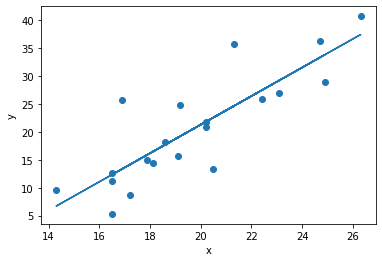

In [21]:
plotData2(data2,data4)

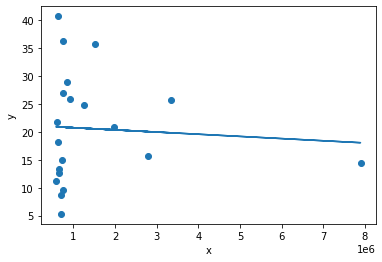

In [22]:
plotData2(data1,data4)

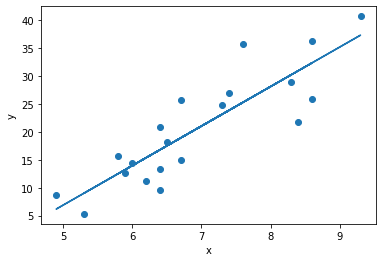

In [23]:
plotData2(data3,data4)

In [24]:
runTests_MySimpleLinearRegression()

In [60]:
fraction = 0.8
# we  divide the content into the training and validation set
# we also randomly shuffle the content
trainingSet=data.sample(frac=fraction)
validationSet=data.drop(trainingSet.index)
xTrain=[]
xValid=[]

for i in range(1,4):    
    xTrain.append(trainingSet.iloc[:, i].values.tolist())
    xValid.append(validationSet.iloc[:, i].values.tolist())

yTrain = trainingSet.iloc[:, 4].values.tolist()
yValid = validationSet.iloc[:, 4].values.tolist()

print(xValid[0])
print(yValid[0])
print(validationSet.head())
#print(trainingSet.head())
#print(validationSet.iloc[:, 2].values.tolist())
#print(trainingSet.iloc[:, 2].values.tolist())
print("xTrain",xTrain)
#print("xTrain[0]",xTrain[0])

[643000, 2793000, 854000, 595000]
13.4
    index  inhabitants  incomeBelow5k  unemployed  murders
1       2       643000           20.5         6.4     13.4
12     13      2793000           19.1         5.8     15.7
15     16       854000           24.9         8.3     28.9
18     19       595000           20.2         8.4     21.7
xTrain [[749000, 643000, 741000, 1248000, 7895000, 3353000, 716000, 762000, 635000, 625000, 587000, 692000, 713000, 1964000, 1531000, 921000], [14.3, 16.5, 24.7, 19.2, 18.1, 16.9, 17.9, 23.1, 26.3, 18.6, 16.5, 16.5, 17.2, 20.2, 21.3, 22.4], [6.4, 5.9, 8.6, 7.3, 6.0, 6.7, 6.7, 7.4, 9.3, 6.5, 6.2, 5.3, 4.9, 6.4, 7.6, 8.6]]
xTrain[0] [749000, 643000, 741000, 1248000, 7895000, 3353000, 716000, 762000, 635000, 625000, 587000, 692000, 713000, 1964000, 1531000, 921000]


In [55]:
def meanSquaredError(x,y):
    a = np.array(x)
    b = np.array(y)
    mse = np.square(a-b).mean() 
    return mse

In [63]:
if fraction < 1:
    #we calculate training error and validation error for unemployed vs murders
    trainError=[]
    validError=[]
    model = MySimpleLinearRegression()
    datasetList = [data1,data2,data3]
    for i in range(0,3):
        model.fit(datasetList[i],data4)
        trainPredictions = [model.predict(x) for x in xTrain[i]] #xTrain[i] = list containing the xTrain for a given dataset
        validationPredictions = [model.predict(x) for x in xValid[i]]   
        trainError.append(meanSquaredError(trainPredictions,yTrain))
        validError.append(meanSquaredError(validationPredictions,yValid))
        print("Training error for data", i+1,"=",trainError[i])
        print("Test error for data", i+1,"=",validError[i])

#print("trainError",trainError)
#print("trainPredictions",validError)

Training error for data 1 = 106.61021496265127
Test error for data 1 = 35.27151992018523
Training error for data 2 = 26.735652899239554
Test error for data 2 = 29.773018597502425
Training error for data 3 = 22.434852945999562
Test error for data 3 = 27.161158640953467
